In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [13]:
# Load the customer dataset with CLTV and segments
cltv = pd.read_csv('cltv_dataset.csv')
  # or the dataframe from previous step


Churn
1    2247
0     568
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

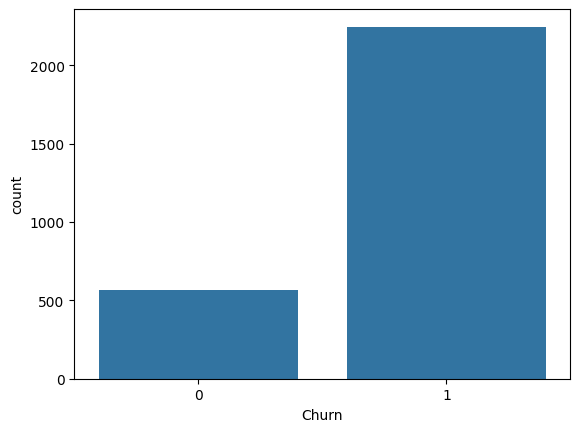

In [14]:
# Define churn as Recency > 90 days (you can tweak this)
cltv['Churn'] = cltv['Recency'].apply(lambda x: 1 if x > 90 else 0)

# Optional: check class balance
print(cltv['Churn'].value_counts())
sns.countplot(data=cltv, x='Churn')


In [15]:
features = ['Frequency', 'Recency', 'Monetary', 'AOV', 'PF', 'CLTV']
X = cltv[features]
y = cltv['Churn']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       447

    accuracy                           1.00       563
   macro avg       1.00      1.00      1.00       563
weighted avg       1.00      1.00      1.00       563

Confusion Matrix:
 [[116   0]
 [  0 447]]


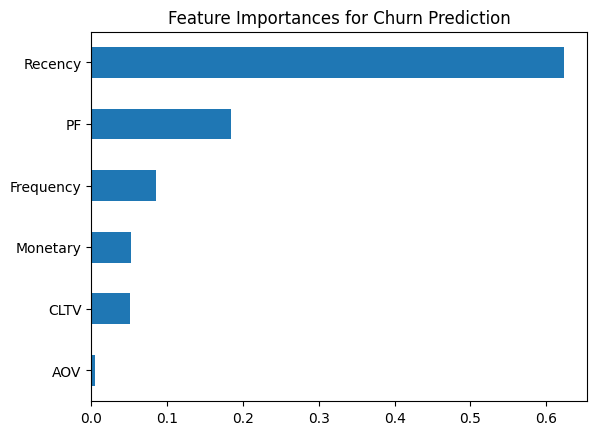

In [19]:
importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances for Churn Prediction")
plt.show()


In [20]:
import joblib
joblib.dump(model, 'E:/c drive/amazon/models/churn_model.pkl')


['E:/c drive/amazon/models/churn_model.pkl']